# Classification Skeleton
---

Import relevant modules.

In [1]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import normalize, scale, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from itertools import cycle
from sklearn import svm
import seaborn as sns
import pandas as pd
import numpy as np

Load data.

In [2]:
data = datasets.load_iris()
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df['target'] = pd.Series(data['target'])

#df = df[df['target'].isin([0,1])]
y = df['target']
X = df.drop(['target'],axis=1)

labels = list(y.drop_duplicates().values)
#labels = [str(x) for x in labels]
N = len(labels)

Input parameters.

In [3]:
tSize = 0.3
rState = 89
cv = 5

classifiers = [(DecisionTreeClassifier(random_state=rState, class_weight='balanced'), 'Decision Tree'),
               (KNeighborsClassifier(n_neighbors=5), 'K-Nearest Neighbor'),
               (RandomForestClassifier(random_state=rState, n_estimators=100), 'Random Forest'),
               (SVC(random_state=rState, kernel='linear', probability=True), 'Support Vector Machine'), #poly, rbf, sigmoid
               (GaussianNB(), 'Gaussian Naive Bayes'), #continuous features follow a normal distribution
               #(MultinomialNB(), 'Multinomial Naive Bayes'), #features are discrete
               #(BernoulliNB(), 'Bernoulli Naive Bayes'), #features are binary
               (MLPClassifier(random_state=rState, solver='lbfgs', max_iter=300), 'Neural Net') #adam for larger dataset
              ]

First pass.


DECISION TREE:

Acc. Train: 0.92
Acc. Test: 0.98


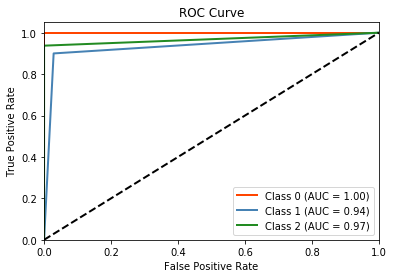


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        16

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



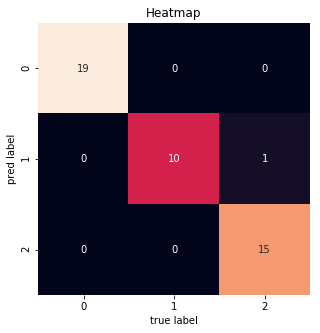


Feature Importance:
              feature  importance
1   petal width (cm)    0.914673
3  petal length (cm)    0.050240
0   sepal width (cm)    0.020619
2  sepal length (cm)    0.014469


****************************************************************************************************

K-NEAREST NEIGHBOR:

Acc. Train: 0.94
Acc. Test: 0.96


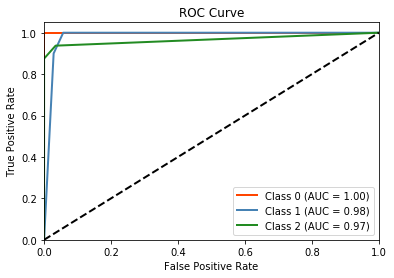


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.93        16

   micro avg       0.96      0.96      0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



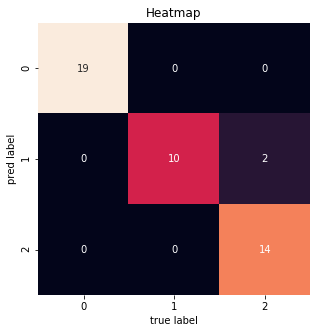

****************************************************************************************************

RANDOM FOREST:

Acc. Train: 0.92
Acc. Test: 0.98


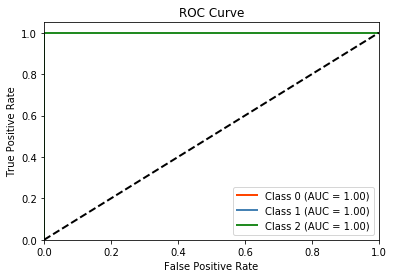


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        16

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



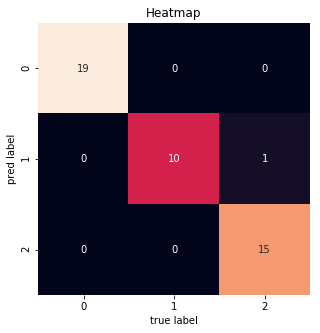


Feature Importance:
              feature  importance
1   petal width (cm)    0.435088
3  petal length (cm)    0.431629
2  sepal length (cm)    0.096709
0   sepal width (cm)    0.036574


****************************************************************************************************

SUPPORT VECTOR MACHINE:

Acc. Train: 0.96
Acc. Test: 0.98


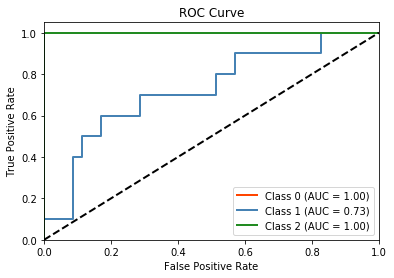


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        16

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



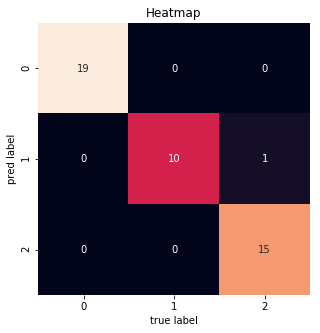

****************************************************************************************************

GAUSSIAN NAIVE BAYES:

Acc. Train: 0.94
Acc. Test: 0.98


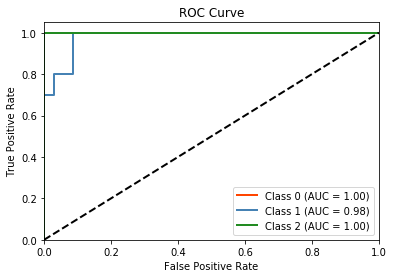


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        16

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



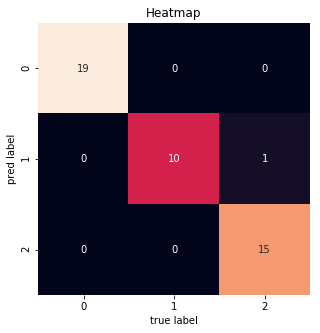

****************************************************************************************************

NEURAL NET:

Acc. Train: 0.94
Acc. Test: 0.96


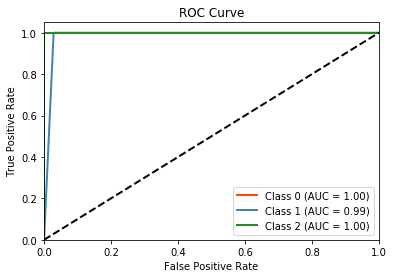


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.83      1.00      0.91        10
           2       1.00      0.94      0.97        16

   micro avg       0.96      0.96      0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



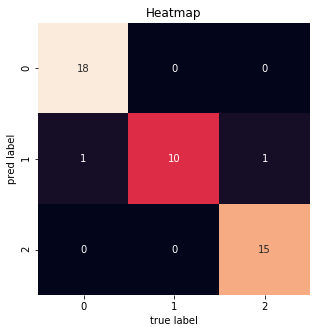

****************************************************************************************************


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tSize, random_state=rState)
feats = X_train.columns
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

for clf_ in classifiers:

    print('\n' + clf_[1].upper() + ':')
    clf = clf_[0]
    print('\nAcc. Train:', round(np.mean(cross_val_score(clf, X_train, y_train, cv=cv)),2))
    clf = clf.fit(X_train, y_train)
    print('Acc. Test:', round(accuracy_score(clf.predict(X_test), y_test),2))

    mat = confusion_matrix(y_test, clf.predict(X_test))


    if N == 2:

        probs = clf.predict_proba(X_test)
        preds = probs[:,1]
        fpr, tpr, threshold = roc_curve(y_test, preds)
        roc_auc = auc(fpr, tpr)

        plt.title('ROC Curve')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'k--', lw=2)
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

    elif N > 2:

        y_ = label_binarize(y, classes=labels)
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_, test_size=tSize, random_state=rState)
        
        scaler.fit(Xtrain)
        Xtrain = scaler.transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        classifier = OneVsRestClassifier(clf)
        probs = classifier.fit(Xtrain, ytrain).predict_proba(Xtest)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(N):
            fpr[i], tpr[i], _ = roc_curve(ytest[:, i], probs[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure()
        colors = cycle(['orangered', 'steelblue', 'forestgreen', 'gold', 'chocalate', 
                        'crimson', 'mediumorchid', 'chocalate', 'slategray', 'black'])

        for i, color in zip(range(N), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label='Class {0} (AUC = {1:0.2f})'
                     ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

    print('\nClassification Report:\n\n', classification_report(y_test,  clf.predict(X_test)))

    plt.figure(figsize=(5, 5))
    ax = sns.heatmap(mat.T, square = True, annot = True, fmt='d', cbar=False,
                    xticklabels = labels, yticklabels= labels)
    plt.xlabel('true label')
    plt.ylabel('pred label')
    plt.title('Heatmap')
    plt.show()
    
    try:
        imp = dict(zip(feats, clf.feature_importances_))
        dfImp = pd.DataFrame(list(imp.items()) ,columns=['feature', 'importance'])
        print('\nFeature Importance:\n',dfImp.sort_values(by=['importance'], ascending=False))
        print('\n')
    except:
        pass
    
    print('*'*100)

Grid search...